# The L10n14 link complement (Dunfield's counterexample)

In [1]:
import twisted_l2
import itertools
import regina
import snappy

## Compute the chain complex of the universal cover:

In [2]:
twisted_l2.load_hap()

true

In [196]:
mfd_name = "L10n14"
tri = regina.Triangulation3(snappy.Manifold(mfd_name))
print(tri.fVector())

[2, 10, 20, 10]


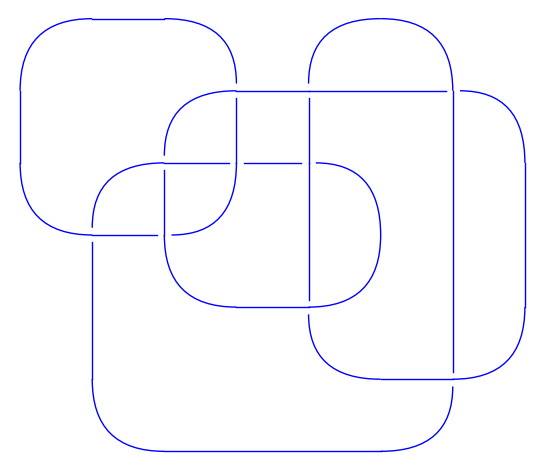

In [220]:
snappy.Link("L10n14").sage_link().plot()

In [197]:
%time fl = twisted_l2.regina_tri_to_face_lattice(tri, ideal=True, simplify=True)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 15.8 ms


In [198]:
%time cw = twisted_l2.cw_complex(fl)

CPU times: user 7.82 ms, sys: 0 ns, total: 7.82 ms
Wall time: 7.87 ms


In [199]:
number_of_cells = twisted_l2.gap_member(cw, "nrCells")
print("Number of cells in each dimension:")
for j in range(6):
    print(f"{j}: {number_of_cells(j)}")

Number of cells in each dimension:
0: 108
1: 720
2: 1212
3: 600
4: 0
5: 0


In [200]:
%time chain_complex = twisted_l2.equivariant_cc(cw, gap=False)

CPU times: user 12.2 ms, sys: 13 µs, total: 12.2 ms
Wall time: 12.3 ms


In [201]:
[chain_complex.dimension(i) for i in range(5)]

[1, 2, 1, 0, 0]

In [202]:
G = twisted_l2.get_fundamental_group(chain_complex)

In [203]:
cc = twisted_l2.get_differentials(chain_complex)

The variable `chain_complex` wraps a GAP object,
while `cc` is simply a list of matrices over the group algebra of `G`. \
Actually, for technical reasons, we use the free group on the generators of `G` instead of `G` itself.

The above cell is equivalent to
```
cc = [twisted_l2.boundary_operator(chain_complex, i, G) for i in range(1, 3)]
```

## Or load precomputed data:

Since simplification is non-deterministic, the dimensions of the chain complex modules rarely end up so small.\
For consistency, we load a precomputed version:

In [3]:
# twisted_l2.save_to_file("data/L10n14-2.json", group=G, cc=cc)
G, cc = twisted_l2.load_from_file("data/L10n14.json")

In [4]:
G

Finitely presented group < x0, x1 | x0*(x1*x0^-1*x1^-2*x0^-1)^2*x1*x0^3*x1*x0^-1*x1^-2*x0^-1*x1*x0^-1*(x1^-1*x0*x1^2*x0)^2*x1^-1*x0^-3*x1^-1*x0*x1^2*x0*x1^-1 >

In [5]:
# Choose the desired configuration (see "configs.py")
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.MINIMAL
twisted_l2.configs.LogOptions.PRECISION = 8

Here are the Thurston (blue) and Alexander (green) unit balls in the dual basis $x_0^*, x_1^*$:

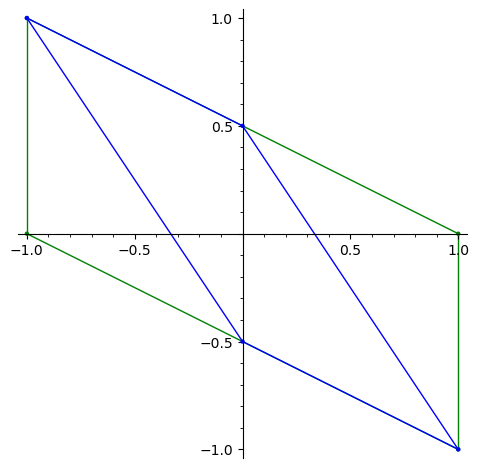

In [6]:
pltA = Polyhedron(vertices = [(1,0),(1,-1),(-1,0),(-1,1)]).plot(wireframe="green", fill="white") # Alexander
pltT = Polyhedron(vertices = [(0,0.5),(1,-1),(0,-0.5),(-1,1)]).plot(wireframe="blue", fill="white") # Thurston
show(pltA + pltT)

Here are some values of the Alexander and Thurston norms:

| v      | $\lVert\cdot\rVert_A$ | $\lVert\cdot\rVert_T = -\chi^{(2)}$ |
| :-:    | :-:                   | :-:                                 |
| (0,1)  | 2                     | 2                                   |
| (-1,2) | 3                     | 3                                   |
| (-1,1) | 1                     | 1                                   |
| (1,0)  | 1                     | 3                                   |



### v = (0,1)

In [8]:
%%time
for exps in [(1,), (0,1), (2,), (0,2), (3,)]:
    description_string = ', '.join(str(c) for c in exps)
    print(f"===== exps = ({description_string}) =====")
    
    for j in (1,2):
        print(f"----- n = {j} -----")
        twisted_l2.characteristic(G, (0,1), cc, j, exps)
    print(flush=True)

===== exps = (1) =====
----- n = 1 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [1, 2, 2]
Characteristic        : -2.0
----- n = 2 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -2.0

===== exps = (0, 1) =====
----- n = 1 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [1, 3, 3]
Characteristic        : -2.0
----- n = 2 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [3, 3, 3]
Characteristic        : -2.0

===== exps = (2) =====
----- n = 1 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [1, 8, 4]
Characteristic        : -2.0
----- n = 2 -----
Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        :

Independently of `exps`, once valuations stabilize, we get:

- valuations            : $[0, 1, 0]$
- degrees of Laplacians : $[2, 8, 6]$
- characteristic        : $-2$

### v = (-1,2)

In [9]:
%%time
for exps in [(1,), (0,1), (2,), (0,2), (3,)]:
    description_string = ', '.join(str(c) for c in exps)
    print(f"===== exps = ({description_string}) =====")
    
    for j in (1,2,3,4):
        print(f"----- n = {j} -----")
        twisted_l2.characteristic(G, (-1,2), cc, j, exps)
    print(flush=True)

===== exps = (1) =====
----- n = 1 -----
Degrees of Laplacians : [4.0, 18.0, 10.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -1.0
----- n = 2 -----
Degrees of Laplacians : [4.0, 16.0, 10.0]
Valuations            : [0.0, 2.0, 0.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -2.0
----- n = 3 -----
Degrees of Laplacians : [4.0, 14.0, 10.0]
Valuations            : [0.0, 3.0, 0.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -3.0
----- n = 4 -----
Degrees of Laplacians : [4.0, 14.0, 10.0]
Valuations            : [0.0, 3.0, 0.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -3.0

===== exps = (0, 1) =====
----- n = 1 -----
Degrees of Laplacians : [4.0, 18.0, 10.0]
Valuations            : [0.0, 1.0, 0.0]
Quotient sizes        : [3, 3, 1]
Characteristic        : -1.0
----- n = 2 -----
Degrees of Laplacians : [4.0, 16.0, 10.0]
Valuations            : [0.0, 2.0, 0.0]
Quotient sizes        : [3, 3, 3]
C

Independently of `exps`, once valuations stabilize, we get:

- valuations            : $[0, 3, 0]$
- degrees of Laplacians : $[4, 14, 10]$
- characteristic        : $-3$

### v = (-1,1)

Here the algorithm does not converge as easily. First, we try `n = 4` on the same list of `exps`:

In [10]:
%%time
for exps in [(1,), (0,1), (2,), (0,2), (3,)]:
    description_string = ', '.join(str(c) for c in exps)
    print(f"===== exps = ({description_string}) =====")
    twisted_l2.characteristic(G, (-1,1), cc, 4, exps)
    print(flush=True)

===== exps = (1) =====
Degrees of Laplacians : [1.0, 1.0, -1.0]
Valuations            : [0.5, 4.5, 2.5]
Quotient sizes        : [2, 2, 2]
Characteristic        : 1.5

===== exps = (0, 1) =====
Degrees of Laplacians : [2.0, 4.0, 1.33333333]
Valuations            : [0.0, 3.0, 1.33333333]
Quotient sizes        : [3, 3, 3]
Characteristic        : 0.66666667

===== exps = (2) =====
Degrees of Laplacians : [1.25, 4.0, 1.75]
Valuations            : [0.375, 3.0, 1.125]
Quotient sizes        : [8, 8, 8]
Characteristic        : 0.25

===== exps = (0, 2) =====
Degrees of Laplacians : [2.0, 5.33333333, 2.96296296]
Valuations            : [0.0, 2.33333333, 0.51851852]
Quotient sizes        : [27, 27, 27]
Characteristic        : -0.2962963

===== exps = (3) =====
Degrees of Laplacians : [1.59375, 4.90625, 2.78125]
Valuations            : [0.203125, 2.546875, 0.609375]
Quotient sizes        : [64, 128, 128]
Characteristic        : -0.328125

CPU times: user 3.69 s, sys: 19.7 ms, total: 3.7 s
Wall tim

The valuations appear to approach $[0,2,0]$.\
If these are the correct values, then by running the algorithm again with `n = 2` we should get $[0,2,0]$ again.\
If we do, then we can be reasonably confident that $[0,2,0]$ are the correct values (since the valuations are concave non-decreasing in `n`).

The goal being to run the algorithm with `exps = (0, 3)` (a $3$-nilpotent $3$-group quotient) while still taking `n = 2`.\
Since in this case $|L| = 2187$, this is a significant speedup over `n = 4`.

In [11]:
%%time
for exps in [(1,), (0,1), (2,), (0,2), (3,)]:
    description_string = ', '.join(str(c) for c in exps)
    print(f"===== exps = ({description_string}) =====")
    twisted_l2.characteristic(G, (-1,1), cc, 2, exps)
    print(flush=True)

===== exps = (1) =====
Degrees of Laplacians : [1.0, 5.0, 1.0]
Valuations            : [0.5, 2.5, 1.5]
Quotient sizes        : [2, 2, 2]
Characteristic        : 1.5

===== exps = (0, 1) =====
Degrees of Laplacians : [2.0, 5.33333333, 2.66666667]
Valuations            : [0.0, 2.33333333, 0.66666667]
Quotient sizes        : [3, 3, 3]
Characteristic        : 0.0

===== exps = (2) =====
Degrees of Laplacians : [1.25, 5.5, 2.75]
Valuations            : [0.375, 2.25, 0.625]
Quotient sizes        : [8, 8, 8]
Characteristic        : 0.0

===== exps = (0, 2) =====
Degrees of Laplacians : [2.0, 5.77777778, 3.40740741]
Valuations            : [0.0, 2.11111111, 0.2962963]
Quotient sizes        : [27, 27, 27]
Characteristic        : -0.51851852

===== exps = (3) =====
Degrees of Laplacians : [1.59375, 5.75, 3.21875]
Valuations            : [0.203125, 2.125, 0.390625]
Quotient sizes        : [64, 128, 128]
Characteristic        : -0.34375

CPU times: user 1.44 s, sys: 3.34 ms, total: 1.45 s
Wall tim

Indeed, they approach $[0,2,0]$. Let's run the `exps = (0, 3)` case with `n = 2`:

In [12]:
%%time
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.INFO
twisted_l2.characteristic(G, (-1,1), cc, 2, (0,3))
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.MINIMAL

=========== Dimension 0 ===========

Lift: F[1]
Maximum valuation of entries = 2, should expand matrix by 2, expanding by 2 instead
Size of Fin: 59049
|L| = 729
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (1458, 1458)
Rank: 2.0 (rounds up to 2)
Valuation: 0.0
Degree: 2.0

=========== Dimension 1 ===========

Lift: F[1]
Maximum valuation of entries = 5, should expand matrix by 10, expanding by 2 instead
Size of Fin: 59049
|L| = 2187
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (8748, 8748)
Rank: 1.96296296 (rounds up to 2)
Valuation: 2.03703704
Degree: 5.92592593

=========== Dimension 2 ===========

Lift: F[1]
Maximum valuation of entries = 4, should expand matrix by 4, expanding by 2 instead
Size of Fin: 59049
|L| = 2187
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (4374, 4374)
Rank: 1.89117513 (rounds up to 2)
Valuation: 0.10882487
Degree: 3.78235025

Degrees of Laplacians : [2.0, 5.92592593, 3.78235025]
Valuations

Since the Thurston and Alexander norms agree for this value of `v`,\
as a final check, we try $1$-nilpotent $p$-quotients for $p = 5,7,11,\dots,47$:

In [20]:
%%time
# display exact rational values
twisted_l2.configs.LogOptions.PRECISION = twisted_l2.configs.LogOptions.PREC_EXACT
# here we will store intermediate values, such as valuations and degrees
log_objects = {}
characteristics = {}

for j in range(2, 15):
    p = Primes().unrank(j)
    exps = [0] * j + [1]
    print(f"===== {p}-quotient =====")
    char = twisted_l2.characteristic(G, (-1,1), cc, 2, exps)
    log_objects[p] = twisted_l2.get_twisted_l2_logs()
    characteristics[p] = char
    print()

twisted_l2.configs.LogOptions.PRECISION = 8

===== 5-quotient =====
Degrees of Laplacians : [2, 28/5, 16/5]
Valuations            : [0, 11/5, 2/5]
Quotient sizes        : [5, 5, 5]
Characteristic        : -2/5

===== 7-quotient =====
Degrees of Laplacians : [2, 40/7, 24/7]
Valuations            : [0, 15/7, 2/7]
Quotient sizes        : [7, 7, 7]
Characteristic        : -4/7

===== 11-quotient =====
Degrees of Laplacians : [2, 64/11, 40/11]
Valuations            : [0, 23/11, 2/11]
Quotient sizes        : [11, 11, 11]
Characteristic        : -8/11

===== 13-quotient =====
Degrees of Laplacians : [2, 76/13, 48/13]
Valuations            : [0, 27/13, 2/13]
Quotient sizes        : [13, 13, 13]
Characteristic        : -10/13

===== 17-quotient =====
Degrees of Laplacians : [2, 100/17, 64/17]
Valuations            : [0, 35/17, 2/17]
Quotient sizes        : [17, 17, 17]
Characteristic        : -14/17

===== 19-quotient =====
Degrees of Laplacians : [2, 112/19, 72/19]
Valuations            : [0, 39/19, 2/19]
Quotient sizes        : [19, 19,

We can check that for every $p$:

- $|L| = p$
- the valuations are $[0, 2+1/p, 2/p]$
- the degrees of the Laplacians are $[2, 6-2/p, 4-4/p]$
- the computed characteristic is $-1+3/p$

Here is some code that performs this check:

In [22]:
for p, (log0, log1, log2) in log_objects.items():
    # size of L
    assert(log0.Lsize == p
           and log1.Lsize == p
           and log2.Lsize == p)
    # valuations
    assert(log0.valuation == 0
           and log1.valuation == 2+1/p
           and log2.valuation == 2/p)
    # degrees
    assert(log0.degree == 2
           and log1.degree == 6-2/p
           and log2.degree == 4-4/p)
    # characteristic
    assert(characteristics[p] == -1+3/p)

print("Test succeeded")

Test succeeded


### v = (1,0)

This is the first nontrivial case, as the Alexander and Thurston norms differ.\
In a sense, we _need_ highly non-abelian quotients to reach the Thurston norm.

We use `exps` = (1), (2), (3), (0,3), (4) and, since the computation is long, `n = 2`.

In [23]:
%time twisted_l2.characteristic(G, (1,0), cc, 2, (1,))

Degrees of Laplacians : [2.0, 6.0, 4.0]
Valuations            : [0.0, 4.0, 2.0]
Quotient sizes        : [2, 2, 2]
Characteristic        : -1.0
CPU times: user 97.2 ms, sys: 0 ns, total: 97.2 ms
Wall time: 97 ms


-1

In [24]:
%time twisted_l2.characteristic(G, (1,0), cc, 2, (2,))

Degrees of Laplacians : [2.0, 6.0, 4.0]
Valuations            : [0.0, 4.0, 2.0]
Quotient sizes        : [4, 8, 8]
Characteristic        : -1.0
CPU times: user 102 ms, sys: 2 µs, total: 102 ms
Wall time: 101 ms


-1

In [25]:
for j, log_obj in enumerate(twisted_l2.get_twisted_l2_logs()):
    print(f"L_{j}: {log_obj.L.StructureDescription()}")

L_0: C4
L_1: C4 x C2
L_2: C4 x C2


Even the $L$ arising from a $2$-nilpotent quotient is abelian, so we must go deeper.

In [26]:
%time twisted_l2.characteristic(G, (1,0), cc, 2, (3,))

Degrees of Laplacians : [2.0, 8.0, 6.0]
Valuations            : [0.0, 3.0, 1.0]
Quotient sizes        : [8, 128, 128]
Characteristic        : -2.0
CPU times: user 559 ms, sys: 3.34 ms, total: 562 ms
Wall time: 563 ms


-2

In [27]:
# For the last two runs we turn the verbosity up
twisted_l2.configs.LogOptions.LEVEL = twisted_l2.INFO

In [28]:
%time twisted_l2.characteristic(G, (1,0), cc, 2, (0,3))

=========== Dimension 0 ===========

Lift: F[0]
Maximum valuation of entries = 2, should expand matrix by 2, expanding by 2 instead
Size of Fin: 59049
|L| = 27
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (54, 54)
Rank: 2.0 (rounds up to 2)
Valuation: 0.0
Degree: 2.0

=========== Dimension 1 ===========

Lift: F[0]
Maximum valuation of entries = 8, should expand matrix by 16, expanding by 2 instead
Size of Fin: 59049
|L| = 2187
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (8748, 8748)
Rank: 1.33333333 (rounds up to 2)
Valuation: 2.66666667
Degree: 8.66666667

=========== Dimension 2 ===========

Lift: F[0]
Maximum valuation of entries = 8, should expand matrix by 8, expanding by 2 instead
Size of Fin: 59049
|L| = 2187
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (4374, 4374)
Rank: 1.33333333 (rounds up to 2)
Valuation: 0.66666667
Degree: 6.66666667

Degrees of Laplacians : [2.0, 8.66666667, 6.66666667]
Valuations     

-7/3

The last run takes at least 15 minutes on most machines:

In [29]:
%time twisted_l2.characteristic(G, (1,0), cc, 2, (4,))

=========== Dimension 0 ===========

Lift: F[0]
Maximum valuation of entries = 2, should expand matrix by 2, expanding by 2 instead
Size of Fin: 131072
|L| = 16
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (32, 32)
Rank: 2.0 (rounds up to 2)
Valuation: 0.0
Degree: 2.0

=========== Dimension 1 ===========

Lift: F[0]
Maximum valuation of entries = 8, should expand matrix by 16, expanding by 2 instead
Size of Fin: 131072
|L| = 8192
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (32768, 32768)
Rank: 1.5 (rounds up to 2)
Valuation: 2.5
Degree: 9.0

=========== Dimension 2 ===========

Lift: F[0]
Maximum valuation of entries = 8, should expand matrix by 8, expanding by 2 instead
Size of Fin: 131072
|L| = 8192
Constructing matrix over Q[L]...
Computing rank...
Dimensions of N: (16384, 16384)
Rank: 1.5 (rounds up to 2)
Valuation: 0.5
Degree: 7.0

Degrees of Laplacians : [2.0, 9.0, 7.0]
Valuations            : [0.0, 2.5, 0.5]
Quotient sizes        : 

-5/2

The valuations appear to converge to $[0,2,0]$. The corresponding degrees of the Laplacians are $[10, 8, 3]$*,\
corresponding to $\chi^{(2)} = -3$, as expected.

*this can be obtained from the formula $\Delta(\text{Laplacian degree}) = -2\Delta(\text{valuation})$, where $\Delta$ stands for "difference".